<a href="https://colab.research.google.com/github/v1s2k/AKMS/blob/main/%D0%9F%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
! unzip '/content/archive.zip'


Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.10.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.100.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.101.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.102.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.103.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.104.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.105.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.106.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.107.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.108.jpg  
  inflating: cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/dog.109.jpg  
  inflati

In [77]:
! ls

archive.zip  cats_and_dogs_filtered  drive  sample_data


In [126]:
!ls cats_and_dogs_filtered/cats_and_dogs_filtered/

train  validation  vectorize.py


In [128]:
!ls cats_and_dogs_filtered/cats_and_dogs_filtered/train

cats  dogs


In [115]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from torch import *
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score

In [129]:
transform_train = transforms.Compose(
    [transforms.Resize((50,50)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],
                          std=[0.229,0.224,0.225])
])
transform_val =  transforms.Compose(
    [transforms.Resize((50,50)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485,0.456,0.406],
                          std=[0.229,0.224,0.225])
])

In [130]:
train_data = datasets.ImageFolder("cats_and_dogs_filtered/cats_and_dogs_filtered/train",transform=transform_train)
test_data = datasets.ImageFolder("cats_and_dogs_filtered/cats_and_dogs_filtered/validation",transform = transform_val)

In [131]:
train_data

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: cats_and_dogs_filtered/cats_and_dogs_filtered/train
    StandardTransform
Transform: Compose(
               Resize(size=(50, 50), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [134]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data), shuffle=False)


In [135]:
dataiter = iter(train_loader)

images, labels = next(dataiter)


In [136]:
images.shape, labels.shape

(torch.Size([32, 3, 50, 50]), torch.Size([32]))

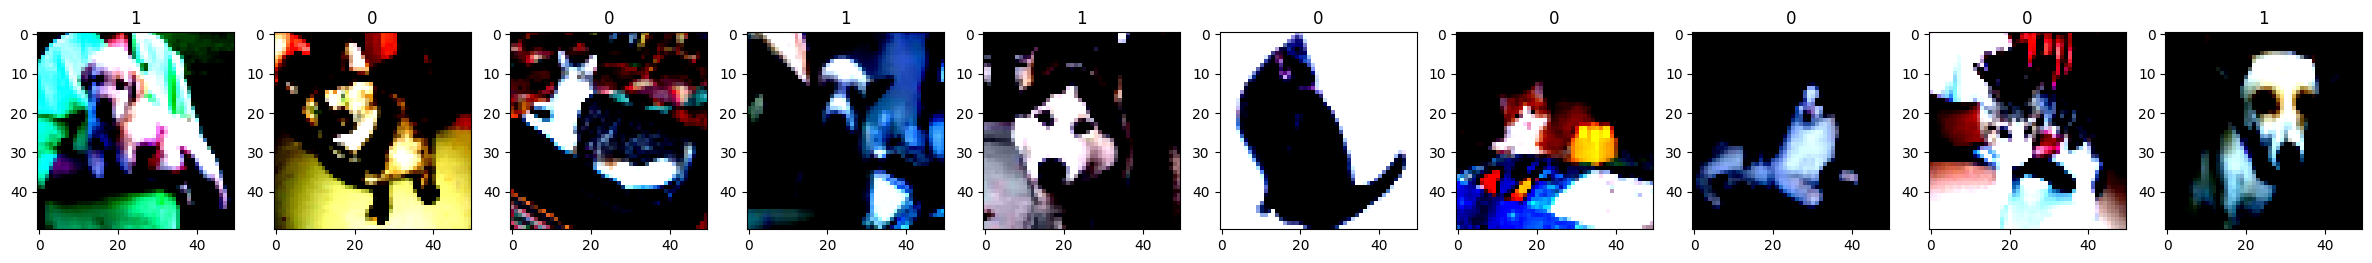

In [137]:
def show_imgs(imgs,labels):
  f,axes = plt.subplots(1,10,figsize = (30,10))
  for i, axis in enumerate(axes):
    axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(),(1,2,0))),cmap='gray')
    axes[i].set_title(labels[i].numpy())
  plt.show()

show_imgs(images,labels)

In [123]:
import torch.nn as nn
import torch.nn.functional as F

In [141]:
class Flatten(nn.Module):
  def forward(self,input):
    return input.view(input.size(0),-1)

class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,10,kernel_size=3)
    self.mp1 = nn.MaxPool2d((2,2))
    self.conv2 = nn.Conv2d(10,3,kernel_size=3)

    self.flatten = Flatten()
    self.fc1 = nn.Linear(1452,256)
    self.fc2 = nn.Linear(256,2)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.mp1(x)
    x = F.relu(self.conv2(x))
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = F.softmax(self.fc2(x))
    return x

In [145]:
def train(net, n_epoch = 5):
  loss_fn = torch.nn.CrossEntropyLoss()
  learning_rate = 1e-3
  optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)

  for epoch in tqdm_notebook(range(0,4)):

    running_loss = 0.0
    train_dataiter = iter(train_loader)

    for i, batch in enumerate (tqdm_notebook(train_dataiter)):
      X_batch, y_batch = batch
      optimizer.zero_grad()

      y_pred = net(X_batch)
      loss = loss_fn(y_pred, y_batch)

      loss.backward()
      optimizer.step()

      running_loss +=loss.item()
      if i % 10 == 9:
        print('[%d, %5d] loss: %.3f, acc :%3f'%
              (epoch+1,i+1,running_loss / 500, accuracy_score(y_batch.numpy(),np.argmax(y_pred.detach().numpy(),axis = 1))))
        running_loss = 0.0
  print('Обучение закончено')
  return net

In [146]:
net = ConvNet()
net = train(net)

<ipython-input-145-8d20c051a2c3>:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  for epoch in tqdm_notebook(range(0,4)):
<ipython-input-145-8d20c051a2c3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(0,4)):


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    10] loss: 0.014, acc :0.656250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    20] loss: 0.014, acc :0.406250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    30] loss: 0.014, acc :0.687500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    40] loss: 0.014, acc :0.593750


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    50] loss: 0.013, acc :0.656250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,    60] loss: 0.013, acc :0.656250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))
<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[2,    10] loss: 0.013, acc :0.750000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[2,    20] loss: 0.013, acc :0.625000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[2,    30] loss: 0.011, acc :0.750000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[2,    40] loss: 0.012, acc :0.562500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[2,    50] loss: 0.013, acc :0.593750


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[2,    60] loss: 0.012, acc :0.718750


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))
<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[3,    10] loss: 0.012, acc :0.625000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[3,    20] loss: 0.012, acc :0.531250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[3,    30] loss: 0.012, acc :0.687500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[3,    40] loss: 0.011, acc :0.687500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[3,    50] loss: 0.012, acc :0.656250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[3,    60] loss: 0.013, acc :0.781250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))
<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[4,    10] loss: 0.013, acc :0.625000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[4,    20] loss: 0.012, acc :0.812500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[4,    30] loss: 0.011, acc :0.718750


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[4,    40] loss: 0.011, acc :0.812500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[4,    50] loss: 0.011, acc :0.656250


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[4,    60] loss: 0.011, acc :0.500000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))
<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[5,    10] loss: 0.011, acc :0.875000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[5,    20] loss: 0.011, acc :0.812500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[5,    30] loss: 0.012, acc :0.687500


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[5,    40] loss: 0.012, acc :0.718750


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[5,    50] loss: 0.011, acc :0.750000


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[5,    60] loss: 0.011, acc :0.812500
Обучение закончено


<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [147]:
test_dataiter = iter(test_loader)
images, labels = next(test_dataiter)

In [148]:
accuracy_score(labels.numpy(),np.argmax(net.forward(images).detach().numpy(),axis = 1))

<ipython-input-141-5c2012fcd297>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


0.627

In [149]:
from torchvision import models
vgg16 = models.vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 139MB/s]


In [150]:
vgg16.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)>

In [151]:
vgg16.classifier = nn.Sequential(*list(vgg16.classifier.children()))[:-1]

In [152]:
vgg16.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
  )
)>

In [153]:
class New_VGG16(nn.Module):
  def __init__(self):
    super().__init__()
    self.vgg16 = vgg16
    for param in self.vgg16.features.parameters():
      param.requires_grad = False
    self.fc = nn.Linear(4096,2)

  def forward(self,x):
    x = self.vgg16(x)
    x = self.fc(x)
    return x

In [154]:
net = New_VGG16()
train(net)

<ipython-input-145-8d20c051a2c3>:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  for epoch in tqdm_notebook(range(0,4)):
<ipython-input-145-8d20c051a2c3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(0,4)):


  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[1,    10] loss: 0.039, acc :0.937500
[1,    20] loss: 0.068, acc :0.656250
[1,    30] loss: 0.032, acc :0.750000
[1,    40] loss: 0.021, acc :0.843750
[1,    50] loss: 0.015, acc :0.718750
[1,    60] loss: 0.012, acc :0.812500


<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[2,    10] loss: 0.012, acc :0.812500
[2,    20] loss: 0.012, acc :0.906250
[2,    30] loss: 0.010, acc :0.843750
[2,    40] loss: 0.012, acc :0.625000
[2,    50] loss: 0.015, acc :0.812500
[2,    60] loss: 0.011, acc :0.750000


<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[3,    10] loss: 0.013, acc :0.812500
[3,    20] loss: 0.012, acc :0.750000
[3,    30] loss: 0.014, acc :0.781250
[3,    40] loss: 0.011, acc :0.750000
[3,    50] loss: 0.013, acc :0.843750
[3,    60] loss: 0.019, acc :0.781250


<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[4,    10] loss: 0.009, acc :0.812500
[4,    20] loss: 0.018, acc :0.781250
[4,    30] loss: 0.022, acc :0.781250
[4,    40] loss: 0.025, acc :0.812500
[4,    50] loss: 0.017, acc :0.843750
[4,    60] loss: 0.033, acc :0.656250


<ipython-input-145-8d20c051a2c3>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate (tqdm_notebook(train_dataiter)):


  0%|          | 0/63 [00:00<?, ?it/s]

[5,    10] loss: 0.025, acc :0.812500
[5,    20] loss: 0.016, acc :0.937500
[5,    30] loss: 0.023, acc :0.875000
[5,    40] loss: 0.027, acc :0.750000
[5,    50] loss: 0.024, acc :0.781250
[5,    60] loss: 0.032, acc :0.781250
Обучение закончено


New_VGG16(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16)

In [155]:
test_dataiter = iter(test_loader)
images, labales = next(test_dataiter)

In [156]:
accuracy_score(labels.numpy(),np.argmax(net.forward(images).detach().numpy(),axis = 1))

0.8